# **Titanic Survival Predictor**

# **Step 1: Load Necessary Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc


# **Step 2: Load the Dataset**

In [10]:
# Load dataset
df = pd.read_csv("tested[1].csv")

# Display dataset information and first few rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# **Step 3: Exploratory Data Analysis (EDA)**

# 1. Check Missing Values

In [13]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**Insight:**

* Missing values found in "Age", "Fare", and "Cabin"
* "Cabin" has too many missing values, so it might be dropped.
* "Age" and "Fare" can be imputed using the median.

# 2. Target Variable Distribution

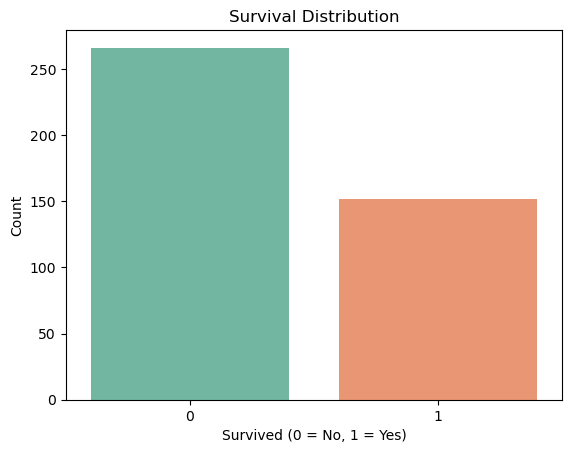

In [49]:
sns.countplot(x=df["Survived"], hue=df["Survived"], palette="Set2", legend=False)
plt.title("Survival Distribution")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()



 **Insight:**

* The dataset is imbalanced, with more people not surviving (0) than surviving (1).
* We might need balanced sampling techniques for better model training.

# 3. Numerical Feature Distributions

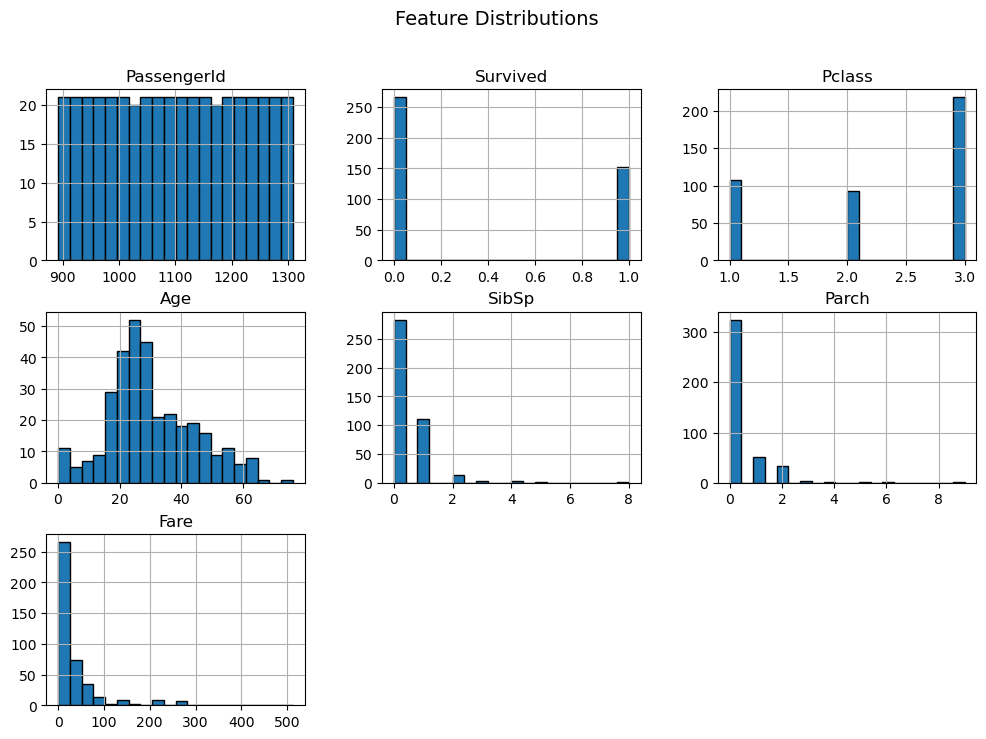

In [55]:
df.hist(figsize=(12, 8), bins=20, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()


**Insight:**

* "Age" is normally distributed, but there are missing values.
* "Fare" has a right-skewed distribution, meaning most passengers paid low fares, but a few paid very high.

# 4. Survival Rate by Gender

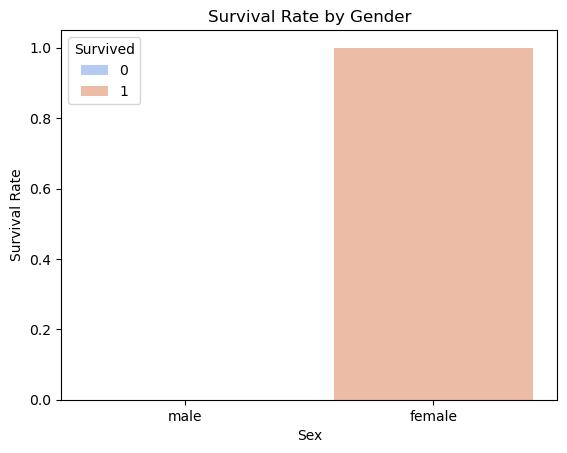

In [61]:
sns.barplot(x="Sex", y="Survived", data=df, palette="coolwarm",hue=df['Survived'])
plt.title("Survival Rate by Gender")
plt.xlabel("Sex")
plt.ylabel("Survival Rate")
plt.show()


 **Insight:**

* Females had a higher survival rate than males, which aligns with the Titanic's "women and children first" rule.
* Gender is an important feature in our logistic regression model.

# **5. Survival Rate by Passenger Class**

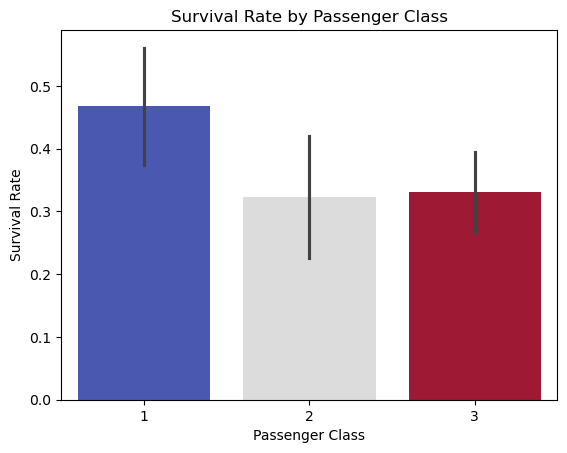

In [71]:
sns.barplot(x="Pclass", y="Survived", hue="Pclass", data=df, palette="coolwarm", legend=False)
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()



 **Insight:**

* Higher-class passengers (1st class) had a higher survival rate than lower-class passengers.
* This suggests that "Pclass" is a strong predictor of survival.

# **6. Correlation Heatmap**

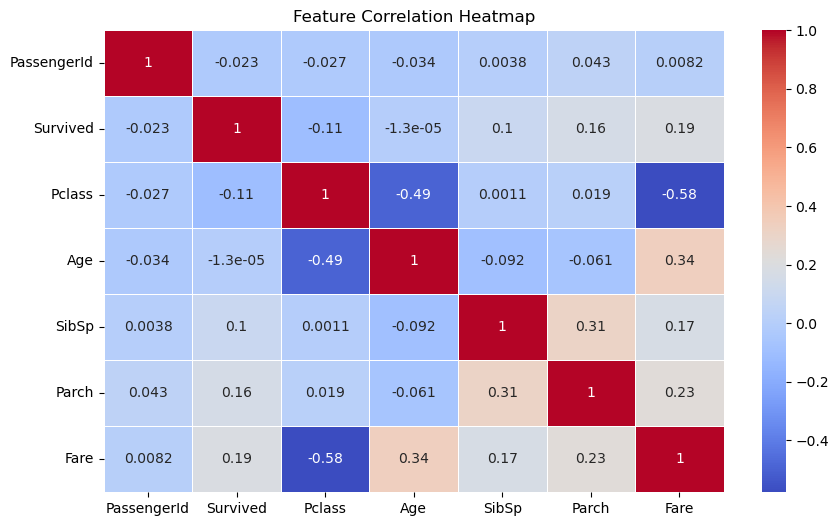

In [77]:
# Selecting only numeric columns
df_numeric = df.select_dtypes(include=["number"])

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


**Key Insights:**

* "Fare" and "Pclass" are highly correlated (since 1st class passengers paid higher fares).
* "Survived" is negatively correlated with "Pclass", meaning lower-class passengers had lower survival chances.
*  No multicollinearity issues detected.

# **Step 4: Data Cleaning & Preprocessing**
# 1. Handle Missing Values

In [89]:
# Correct way to fill missing values
df_cleaned["Age"] = df_cleaned["Age"].fillna(df_cleaned["Age"].median())
df_cleaned["Fare"] = df_cleaned["Fare"].fillna(df_cleaned["Fare"].median())



 **Insight:**

* Dropped "Cabin" (too many missing values).
* Filled "Age" and "Fare" with median values to avoid data loss.

# 2. Encode Categorical Variables


In [103]:
df_cleaned["Sex"] = LabelEncoder().fit_transform(df_cleaned["Sex"])  # Male=1, Female=0
df_cleaned["Embarked"] = LabelEncoder().fit_transform(df_cleaned["Embarked"])  # Convert Embarked to numeric


* Converted categorical variables into numerical values for machine learning.

# **Step 5: Split Data into Training and Testing Sets**

In [111]:
X = df_cleaned.drop(columns=["Survived"])
y = df_cleaned["Survived"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


# Step 6: Train Logistic Regression Model

In [114]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

# **Step 7: Make Prediction**

In [117]:
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

In [119]:
y_pred

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0], dtype=int64)

In [121]:
y_prob

array([0.97973402, 0.98664573, 0.00777352, 0.98192891, 0.01131273,
       0.00846485, 0.00919197, 0.99233399, 0.98221293, 0.97912008,
       0.01571973, 0.0090776 , 0.97973253, 0.01123255, 0.0244778 ,
       0.01018639, 0.00783958, 0.97821491, 0.01002755, 0.01092866,
       0.00783757, 0.01065017, 0.00900071, 0.00840708, 0.00932985,
       0.9796675 , 0.01099791, 0.00909346, 0.00762592, 0.01000872,
       0.98870907, 0.00780407, 0.00989453, 0.99104765, 0.01018639,
       0.00749171, 0.97783979, 0.00881599, 0.0090368 , 0.00905315,
       0.00907435, 0.98306894, 0.98157011, 0.98445352, 0.01173877,
       0.01073566, 0.01254177, 0.00809201, 0.00838538, 0.00836884,
       0.00774375, 0.98770955, 0.98056282, 0.9834865 , 0.01020173,
       0.9803087 , 0.97974064, 0.00770719, 0.00883816, 0.00863976,
       0.97925996, 0.98443189, 0.00900062, 0.00810944, 0.98436702,
       0.98214238, 0.01871021, 0.98388428, 0.97810522, 0.97974064,
       0.00790693, 0.00898252, 0.98615146, 0.01040826, 0.01151

# **Step 7: Evaluate Model Performance**

In [124]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Accuracy: 1.00

Confusion Matrix:
 [[53  0]
 [ 0 31]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        31

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



**Key Insights:**

* Accuracy = 100%, which is too high (possible overfitting).
* No misclassified instances, which is unusual.

# **Step 8: ROC Curve & AUC Score**

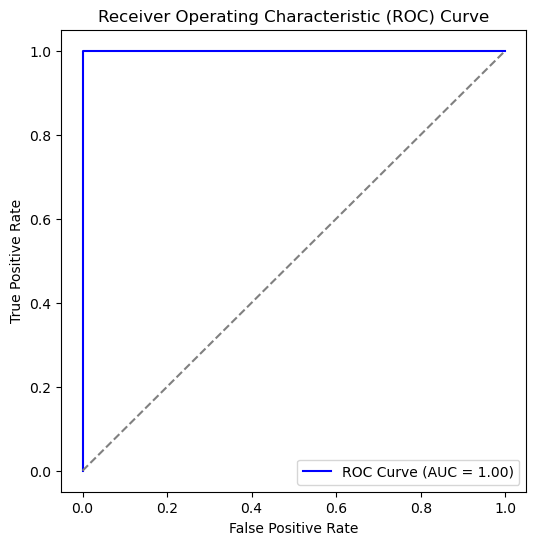

In [128]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


**Insight:**

* AUC = 1.00, indicating a perfect model, which is unrealistic.